<a href="https://colab.research.google.com/github/BlackCurrantDS/ATiML-Project/blob/master/PCA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
train_data = pd.read_csv("features_scaled_train.csv", index_col=0)

In [170]:
train_data.head(1)

,FileNo,book_lenght,book_sen,book_word,lenght_book,number_sen,number_word,number_of_stop_words,number_of_foreignwords,count_dial_break,noun,verb,adj,ProperNoun,num,Puch,she,he,she_he_ratio,period,comma,colon,semi_colon,exl,q,positive_x,negative_x,neutral,compund,positive_y,negative_y,anger,disgust,fear,sadness,anticipation,joy,surprise,trust,genre,Author_Name,Book_Name
0,29400.0,0.630936,0.041672,0.594109,0.630936,0.041672,0.594109,1.582709,-0.60319,0.77563,-0.8806,2.215819,-1.187174,0.0,-0.398413,-0.744598,-0.455629,2.350944,-1.060459,-0.642366,-0.00424,-0.71147,0.467028,-1.126372,-0.548475,-0.075467,0.283623,-0.355818,-1.0389,-0.436278,1.244505,1.266108,1.689566,2.146652,1.550633,1.177633,-0.099771,0.25454,-0.984709,Detective and Mystery,Dawson| Coningsby,Murder Point: A Tale of Keewatin


In [0]:
val_data = pd.read_csv("features_scaled_validation.csv", index_col=0)

In [172]:
val_data.head(1)

,FileNo,book_lenght,book_sen,book_word,lenght_book,number_sen,number_word,number_of_stop_words,number_of_foreignwords,count_dial_break,noun,verb,adj,ProperNoun,num,Puch,she,he,she_he_ratio,period,comma,colon,semi_colon,exl,q,positive_x,negative_x,neutral,compund,positive_y,negative_y,anger,disgust,fear,sadness,anticipation,joy,surprise,trust,genre,Author_Name,Book_Name
0,34947.0,-0.326653,-0.632093,-0.385578,-0.326653,-0.632093,-0.385578,0.601769,-0.84199,0.415587,0.417181,0.027295,0.306535,0.0,-0.433888,-0.465823,-1.090568,-0.026658,-1.164636,-0.474675,0.001262,-1.177392,-1.495094,-0.361853,0.152946,1.971657,-0.316228,-0.271732,1.48675,-0.402266,1.4174,0.530293,-0.06162,0.834182,1.032823,-0.436456,-1.290688,0.28858,-0.290886,Detective and Mystery,Bayly| A. Eric,The House of Strange Secrets: A Detective Story


In [0]:
first_cols = ['FileNo','genre','Author_Name', 'Book_Name']
last_cols = [col for col in train_data.columns if col not in first_cols]

train_data = train_data[first_cols+last_cols]

In [174]:
train_data.head(1)

,FileNo,genre,Author_Name,Book_Name,book_lenght,book_sen,book_word,lenght_book,number_sen,number_word,number_of_stop_words,number_of_foreignwords,count_dial_break,noun,verb,adj,ProperNoun,num,Puch,she,he,she_he_ratio,period,comma,colon,semi_colon,exl,q,positive_x,negative_x,neutral,compund,positive_y,negative_y,anger,disgust,fear,sadness,anticipation,joy,surprise,trust
0,29400.0,Detective and Mystery,Dawson| Coningsby,Murder Point: A Tale of Keewatin,0.630936,0.041672,0.594109,0.630936,0.041672,0.594109,1.582709,-0.60319,0.77563,-0.8806,2.215819,-1.187174,0.0,-0.398413,-0.744598,-0.455629,2.350944,-1.060459,-0.642366,-0.00424,-0.71147,0.467028,-1.126372,-0.548475,-0.075467,0.283623,-0.355818,-1.0389,-0.436278,1.244505,1.266108,1.689566,2.146652,1.550633,1.177633,-0.099771,0.25454,-0.984709


In [175]:
train_data.shape

(88, 42)

In [0]:
first_cols = ['FileNo','genre','Author_Name', 'Book_Name']
last_cols = [col for col in val_data.columns if col not in first_cols]

val_data = val_data[first_cols+last_cols]

In [0]:
X_train,y_train = train_data.values[:,4:], train_data.values[:,1]

In [178]:
print("Shape of training input", X_train.shape)
print("Shape of training output", y_train.shape)

Shape of training input (88, 38)
Shape of training output (88,)


In [0]:
X_val,y_val = val_data.values[:,4:], val_data.values[:,1]

In [180]:
print("Shape of test input", X_val.shape)
print("Shape of test output", y_val.shape)

Shape of test input (11, 38)
Shape of test output (11,)


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

In [182]:
#model selection
for i in (5,10,15,20,25,30,35):
    sc= []
    pca = PCA(n_components=i)
    print("for components =",i,"error is", (1-cross_val_score(pca, X_train, y_train, cv=5)).mean())
    sc.append((1-cross_val_score(pca, X_train, y_train, cv=5)).mean())
print("Average error of 5-fold CV is :" ,sc)


for components = 5 error is 47.91080196498743
for components = 10 error is 49.40192226191838
for components = 15 error is 55.04832208170279
for components = 20 error is 57.058055059413334
for components = 25 error is 59.68315037326956
for components = 30 error is 74.76585957516389
for components = 35 error is inf
Average error of 5-fold CV is : [inf]


In [0]:
pca = PCA(n_components=10)
X_train_pca = pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)


**Logistic regression**

In [0]:
lr = LogisticRegression()
lr.fit(X_train_pca,y_train)
y_pred_lr = lr.predict(X_val_pca)

In [185]:
print("Accuracy on overall test set is:", metrics.accuracy_score(y_val,y_pred_lr))

Accuracy on overall test set is: 0.7272727272727273


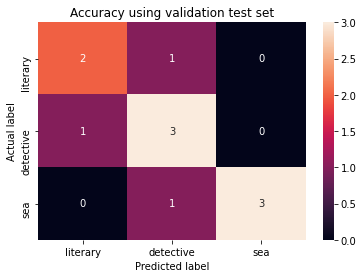

In [186]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_val, y_pred_lr)
cm_df = pd.DataFrame(cm,
                     index = ['literary','detective','sea'], 
                     columns = ['literary','detective','sea'])

sns.heatmap(cm_df, annot=True)
plt.title('Accuracy using validation test set'.format(accuracy_score(y_val, y_pred_lr)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [187]:
print(classification_report(y_val, y_pred_lr))

                       precision    recall  f1-score   support

Detective and Mystery       0.67      0.67      0.67         3
             Literary       0.60      0.75      0.67         4
    Sea and Adventure       1.00      0.75      0.86         4

             accuracy                           0.73        11
            macro avg       0.76      0.72      0.73        11
         weighted avg       0.76      0.73      0.74        11



**SVM**

In [0]:
from sklearn.svm import SVC
lr = SVC()
lr.fit(X_train_pca,y_train)
y_pred_lr = lr.predict(X_val_pca)

In [189]:
print("Accuracy on overall test set is:", metrics.accuracy_score(y_val,y_pred_lr))

Accuracy on overall test set is: 0.5454545454545454


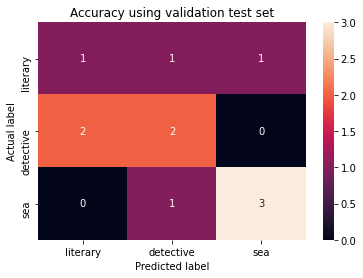

In [190]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_val, y_pred_lr)
cm_df = pd.DataFrame(cm,
                     index = ['literary','detective','sea'], 
                     columns = ['literary','detective','sea'])

sns.heatmap(cm_df, annot=True)
plt.title('Accuracy using validation test set'.format(accuracy_score(y_val, y_pred_lr)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [191]:
print(classification_report(y_val, y_pred_lr))

                       precision    recall  f1-score   support

Detective and Mystery       0.33      0.33      0.33         3
             Literary       0.50      0.50      0.50         4
    Sea and Adventure       0.75      0.75      0.75         4

             accuracy                           0.55        11
            macro avg       0.53      0.53      0.53        11
         weighted avg       0.55      0.55      0.55        11



**Naive Bayes**

In [192]:
from sklearn.naive_bayes import MultinomialNB
lr = MultinomialNB()
lr.fit(X_train_pca,y_train)
y_pred_lr = lr.predict(X_val_pca)

ValueError: ignored

In [0]:
print("Accuracy on overall test set is:", metrics.accuracy_score(y_val,y_pred_lr))

In [0]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_val, y_pred_lr)
cm_df = pd.DataFrame(cm,
                     index = ['literary','detective','sea'], 
                     columns = ['literary','detective','sea'])

sns.heatmap(cm_df, annot=True)
plt.title('Accuracy using validation test set'.format(accuracy_score(y_val, y_pred_lr)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [0]:
print(classification_report(y_val, y_pred_lr))